In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

### Import the data

In [3]:
import json
kaggle_cert = {"username":"moinkhan3012","key":"8acb818b6fdb01e3488bb42682d5bd57"}

!mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as convert_file:
     convert_file.write(json.dumps(kaggle_cert))
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # set permission

In [3]:
os.environ['KAGGLE_USERNAME'] = "moinkhan3012"
os.environ['KAGGLE_KEY'] = "8acb818b6fdb01e3488bb42682d5bd57"

In [4]:
import kaggle

In [5]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('joelljungstrom/128k-airline-reviews',  force=True, unzip=True)


In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/AirlineReviews.csv')

df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [7]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown', 'DatePub',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Review', 'Route',
       'SeatComfortRating', 'ServiceRating', 'Slug', 'Title', 'TravelType',
       'TripVerified', 'ValueRating', 'WifiRating', 'unique_id'],
      dtype='object')

### Handle the missing values

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column relative to the total number of rows
missing_values_percentage = round((df.isnull().sum() / len(df)) * 100, 2)

# Combine the counts and percentages into a DataFrame for a better display
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

print(missing_values_df)

                     Missing Values  Percentage (%)
Aircraft                      93031           71.86
AirlineName                       0            0.00
CabinType                      3018            2.33
DateFlown                     38462           29.71
DatePub                           0            0.00
EntertainmentRating               0            0.00
FoodRating                        0            0.00
GroundServiceRating               0            0.00
OriginCountry                  1678            1.30
OverallScore                   4331            3.35
Recommended                       0            0.00
Review                          824            0.64
Route                         38630           29.84
SeatComfortRating                 0            0.00
ServiceRating                     0            0.00
Slug                              0            0.00
Title                             4            0.00
TravelType                    38309           29.59
TripVerified

In [9]:
# Get unique values from the 'Aircraft' column and sort them alphabetically, excluding non-string values
unique_aircrafts = sorted(set(filter(lambda x: isinstance(x, str), df['Aircraft'].unique())))
print(unique_aircrafts)

[' ', ' A320', ' A320 NEO', ' A320-200', ' A321', ' A330', ' A330 neo / A320', ' A330-200', ' A330-300 /  Boeing B777-300ER', ' A330-300 / A330-200', ' A380-800', ' Boeing 737 / A320', ' Boeing 777  A320', ' CJ-800', ' CRJ-700 / Boeing 757-200', ' E190-E2', ' EMB95', '!', '-', '....', '1 x Boeing 777  3 x A380', '1 x Boeing 777-ER  1 x A380', '1029', '1352', '1429', '2374', '319', '320', '320 Airbus', '320 bus', '320/321', '321', '32A', '330', '330-200  767-400', '332', '350 & 787', '442', '442 I believe', '452', '5J 312', '6E7131', '7', '700 Series', '707', '717', '737', '737 800', '737 800 MAX', '737 Max', '737 Max8', '737- 800', '737-300', '737-700', '737-700 800', '737-700/800', '737-800', '737-800 Max', '737-800 winglet', '737-800(VT-JTN', '737-800/A388', '737-900', '737300', '738', '747', '747 400', '747 800', '747-400', '747-400 and A380', '747-800', '757', '757-200', '767', '767-300', '767-300ER', '773ER', '777', '777 200ER', '777-200', '777-200 & 789', '777-200 and 380', '777-

In [10]:
# Handle the column 'Aircraft'

# Function to determine the manufacturer based on aircraft model name
def determine_manufacturer_corrected(aircraft_name):
    if pd.isna(aircraft_name) or not aircraft_name.strip():
        return np.nan  # Return NaN for missing or empty strings
    aircraft_name = aircraft_name.lower().strip()  # Normalize the string
    if 'boeing' in aircraft_name or aircraft_name.startswith('b') or (aircraft_name[0] == '7' and len(aircraft_name) > 1 and aircraft_name[1].isdigit()):
        return 'Boeing'
    elif 'airbus' in aircraft_name or aircraft_name.startswith('a') or (aircraft_name[0] == '3' and len(aircraft_name) > 1 and aircraft_name[1].isdigit()):
        return 'Airbus'
    elif 'embraer' in aircraft_name or ('e' in aircraft_name and 'embraer' not in aircraft_name):
        return 'Embraer'
    elif 'bombardier' in aircraft_name or 'dash' in aircraft_name or 'crj' in aircraft_name:
        return 'Bombardier'
    else:
        return np.nan  # Return NaN for models not matching any known manufacturer or criteria

# Apply the corrected function to the dataset
df['Aircraft Manufacturer'] = df['Aircraft'].apply(determine_manufacturer_corrected)

# Recalculate the proportions of each manufacturer
corrected_manufacturer_proportions = df['Aircraft Manufacturer'].dropna().value_counts(normalize=True)

# Fill NaN values in 'Aircraft Manufacturer' based on the new proportions
manufacturers_corrected = corrected_manufacturer_proportions.index.tolist()
proportions_corrected = corrected_manufacturer_proportions.values.tolist()

missing_manufacturers_corrected = np.random.choice(manufacturers_corrected, size=df['Aircraft Manufacturer'].isna().sum(), p=proportions_corrected)
df.loc[df['Aircraft Manufacturer'].isna(), 'Aircraft Manufacturer'] = missing_manufacturers_corrected

# Display corrected proportions and verify there are no NaN values left
corrected_manufacturer_proportions, df['Aircraft Manufacturer'].isna().sum()


(Boeing        0.500738
 Airbus        0.462871
 Embraer       0.028456
 Bombardier    0.007935
 Name: Aircraft Manufacturer, dtype: float64,
 0)

In [11]:
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Airbus
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Airbus
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing


In [12]:
# Drop the 'Aircraft' column from the dataframe
df = df.drop('Aircraft', axis=1)

# Verify the column is dropped by displaying the first few rows of the dataframe
df.head()

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer
0,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,yes,...,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Airbus
1,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,...,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer
2,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,...,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer
3,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,yes,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Airbus
4,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,no,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AirlineName            129455 non-null  object 
 1   CabinType              126437 non-null  object 
 2   DateFlown              90993 non-null   object 
 3   DatePub                129455 non-null  object 
 4   EntertainmentRating    129455 non-null  int64  
 5   FoodRating             129455 non-null  int64  
 6   GroundServiceRating    129455 non-null  int64  
 7   OriginCountry          127777 non-null  object 
 8   OverallScore           125124 non-null  float64
 9   Recommended            129455 non-null  object 
 10  Review                 128631 non-null  object 
 11  Route                  90825 non-null   object 
 12  SeatComfortRating      129455 non-null  int64  
 13  ServiceRating          129455 non-null  int64  
 14  Slug                   129455 non-nu

In [14]:
df['Route'].value_counts()

Sydney to Melbourne              149
Melbourne to Sydney              144
Toronto to Vancouver             104
Vancouver to Toronto             104
Bangkok to Phuket                 73
                                ... 
Cologne to Edinburgh               1
Cologne to Hamburg                 1
Düsseldorf to Geneva               1
Phuket to Hamburg via Cologne      1
Paris Beauvais to Riga             1
Name: Route, Length: 51401, dtype: int64

In [15]:
# Fill missing values for categorical columns with the mode'
categorical_columns = ['CabinType','OriginCountry', 'Route', 'TravelType']
for column in categorical_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)


# Standardize 'TripVerified' column and impute missing values based on existing distribution
df['TripVerified'] = df['TripVerified'].replace({'Trip Verified, Trip Verified': 'Trip Verified',
                                                  'Trip Verified,Trip Verified': 'Trip Verified',
                                                  'Not Verified, Not Verified': 'Not Verified',
                                                  'Chicago to Colorado Springs. Not Verified': 'Not Verified',
                                                  'NotVerified': 'Not Verified'})

trip_verified_ratio = df['TripVerified'].value_counts(normalize=True)

missing_trip_verified = df['TripVerified'].isnull().sum()

df.loc[df['TripVerified'].isnull(), 'TripVerified'] = np.random.choice(trip_verified_ratio.index,
                                                                       size=missing_trip_verified,
                                                                       p=trip_verified_ratio.values)

# Fill missing values in 'OverallScore' with the median
overall_score_median = df['OverallScore'].median()
df['OverallScore'].fillna(overall_score_median, inplace=True)


# Drop rows with missing values in 'Review' and 'OriginCountry'
df.dropna(subset=['Review', 'OriginCountry'], inplace=True)


# Format 'DatePub' to yyyy/mm/dd
df['DatePub'] = pd.to_datetime(df['DatePub']).dt.strftime('%Y/%m/%d')


# Format 'DateFlown' to yyyy/mm and impute missing values using 'DatePub' year and month
df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce').dt.to_period('M')
df['DatePubYearMonth'] = pd.to_datetime(df['DatePub']).dt.to_period('M')
df['DateFlown'].fillna(df['DatePubYearMonth'], inplace=True)
df.drop(columns=['DatePubYearMonth'], inplace=True)  # Clean up temporary column


In [16]:
# Split the 'Route' column into 'Departure' and 'Destination' based on the ' to ' delimiter
df['Route_Departure'], df['Route_Destination'] = df['Route'].str.split(' to ', 1).str

# Drop the 'route' column from the dataframe
df.drop('Route', axis=1, inplace=True)

<ipython-input-16-17683e05b1c6>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Route_Departure'], df['Route_Destination'] = df['Route'].str.split(' to ', 1).str
<ipython-input-16-17683e05b1c6>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Route_Departure'], df['Route_Destination'] = df['Route'].str.split(' to ', 1).str


In [17]:
# Display the first few rows to confirm changes
df.head()

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination
0,AB Aviation,Economy Class,2019-11,2019/11/11,0,4,4,Netherlands,9.0,yes,...,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Airbus,Moroni,Moheli
1,AB Aviation,Economy Class,2019-06,2019/06/25,0,1,1,UnitedKingdom,1.0,no,...,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer,Moroni,Anjouan
2,AB Aviation,Economy Class,2019-06,2019/06/25,0,1,1,UnitedKingdom,1.0,no,...,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer,Anjouan,Dzaoudzi
3,Aerocaribbean,Economy Class,2010-12,2010/12/31,0,0,0,Denmark,8.0,yes,...,aerocaribbean,Aerocaribbean customer review,Solo Leisure,Trip Verified,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Airbus,Sydney,Melbourne
4,Aerocaribbean,Economy Class,2010-11,2010/11/25,0,0,0,UnitedKingdom,1.0,no,...,aerocaribbean,Aerocaribbean customer review,Solo Leisure,Not Verified,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing,Sydney,Melbourne


In [18]:
df[df['Route_Departure'] == df['Route_Destination']]

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination
30426,Buddha Air,Economy Class,2018-01,2018/02/15,0,3,1,Germany,8.0,yes,...,buddha-air,Buddha Air did a good job,Solo Leisure,Trip Verified,4,0,ee9fa077-4c4c-4add-9dd0-8b39a8332c95,Boeing,Kathmandu,Kathmandu
93404,Scoot,Economy Class,2017-12,2017/12/15,0,1,3,Australia,2.0,no,...,scoot,cabin crew were aloof,Couple Leisure,Trip Verified,2,0,c0126acb-836c-4bc6-841a-d017df047343,Boeing,Singapore,Singapore


### Find the airlines whose overall rating is decreasing over time

In [19]:
# Ensure 'DatePub' is a datetime column
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Group data by 'AirlineName' and 'DatePub' year to calculate the mean 'OverallScore'
df_grouped = df.groupby(['AirlineName', df['DatePub'].dt.year])['OverallScore'].mean().reset_index()

# Identify airlines whose overall rating is decreasing over time
airlines_decreasing_trend = []

# Iterate through each airline to check if their overall rating is decreasing over time
for airline in df_grouped['AirlineName'].unique():
    df_airline = df_grouped[df_grouped['AirlineName'] == airline].sort_values(by='DatePub')
    if df_airline['OverallScore'].is_monotonic_decreasing:
        airlines_decreasing_trend.append(airline)

airlines_decreasing_trend

['AB Aviation',
 'ATA Airlines',
 'AeroItalia',
 'Air Antilles',
 'Air Burkina',
 'Air Costa',
 "Air Cote d'Ivoire",
 'Air Iceland Connect',
 'Air Labrador',
 'Air Malawi',
 'Air Rarotonga',
 'Alliance Air',
 'Andes Líneas Aéreas',
 'Ariana Afghan Airlines',
 'Armenia Air Company',
 'Auric Air',
 'Avelo Airlines',
 'Azur Air Germany',
 'Badr Airlines',
 'Bluebird Airways',
 'BoraJet',
 'Breeze Airways',
 'Buraq Air',
 'Camair-Co',
 'Cambodia Bayon Airlines',
 'Cobalt',
 'Dimonim Air',
 'Dynamic International Airways',
 'EWA Air',
 'Eastern Airlines',
 'Ernest Airlines',
 'Europe Airpost',
 'Evelop Airlines',
 'FLYONE',
 'FMI Air',
 'FlyArystan',
 'Go First',
 'Golden Myanmar Airlines',
 'Grand Cru Airlines',
 'Greater Bay Airlines',
 'Henan Airlines',
 'HiSky',
 'Himalaya Airlines',
 'Hunnu Air',
 'JC International Airlines',
 'JetsuiteX',
 'Jordan Aviation',
 'KD Air',
 'Kan Air',
 'LC Perú',
 'Lao Airlines',
 'Lubeck Air',
 'Lynx Air',
 'MAYAir',
 'MEGA Maldives Airlines',
 'Mack Air

In [20]:
len(df['AirlineName'].unique())

547

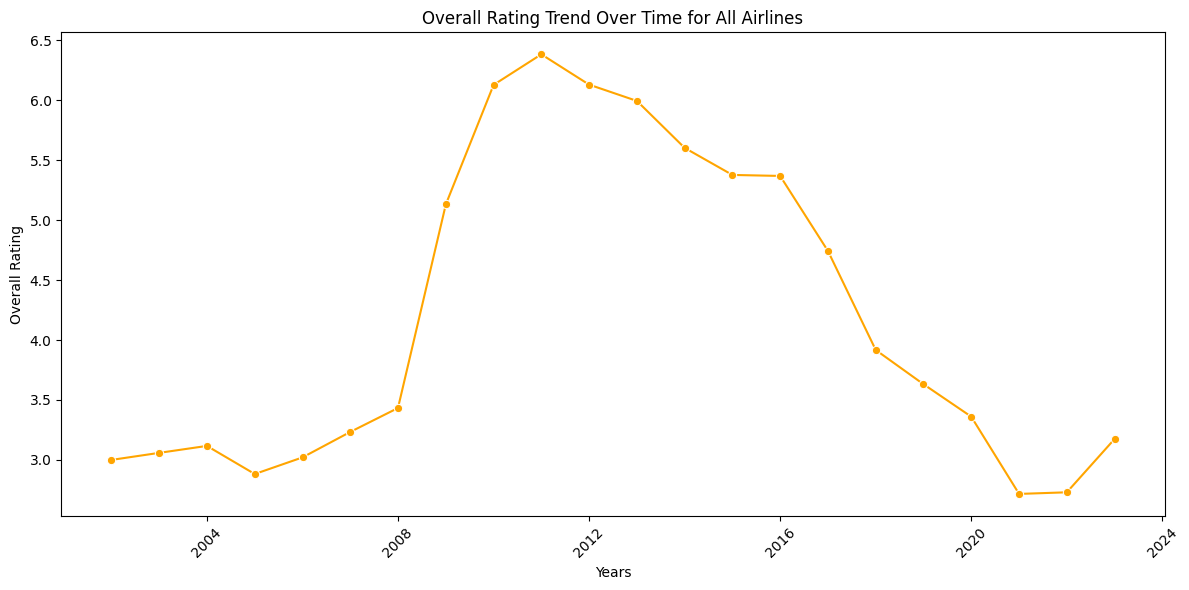

In [21]:
# Convert 'DatePub' to datetime format to facilitate grouping
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Group the dataset by year and calculate the mean 'OverallScore'
df_overall_trend = df.groupby(df['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()

# Convert 'DatePub' from Period to datetime for plotting
df_overall_trend['DatePub'] = df_overall_trend['DatePub'].dt.to_timestamp()

# Plot the trend of 'OverallScore' over time for all airlines combined
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_overall_trend, x='DatePub', y='OverallScore', marker='o', color='orange')
plt.title('Overall Rating Trend Over Time for All Airlines')
plt.xlabel('Years')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Select the airline with the most data points among all airlines whose overall ratings have declined over time for analysis.

<ipython-input-22-bfdb6fa296cf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_airline['DatePub'] = pd.to_datetime(df_selected_airline['DatePub'], errors='coerce')


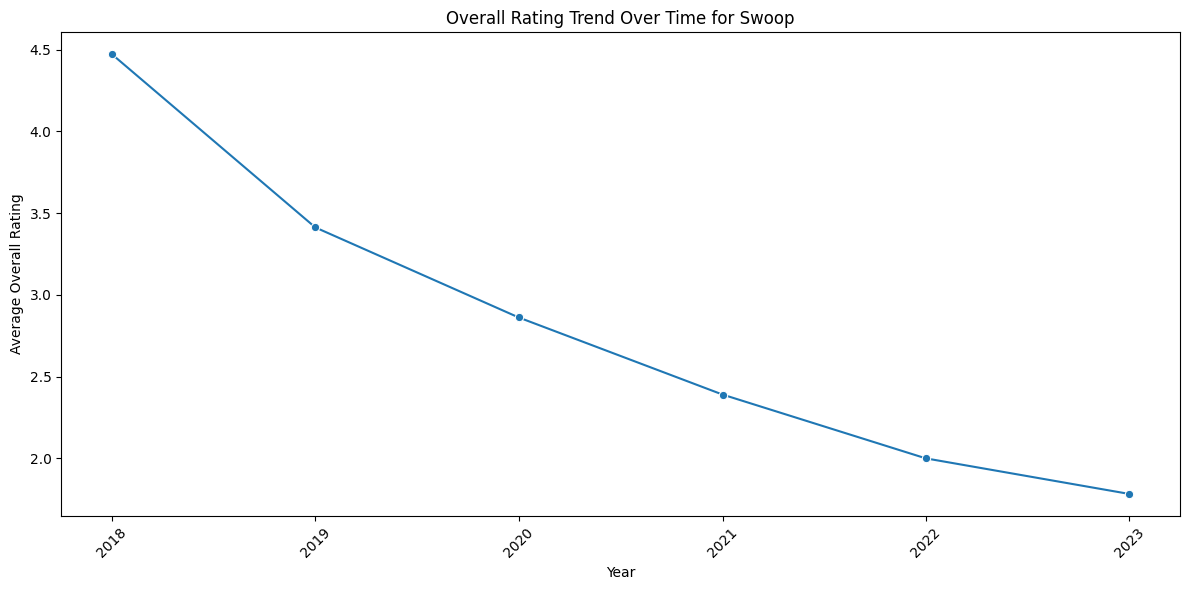

In [22]:
# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()

# Find the airline with the most data points from the decreasing trend list
airline_most_data_decreasing = data_points_per_airline.idxmax()

# Filter the DataFrame for the selected airline
df_selected_airline = df[df['AirlineName'] == airline_most_data_decreasing]

# Ensure 'DatePub' is a datetime column for grouping
df_selected_airline['DatePub'] = pd.to_datetime(df_selected_airline['DatePub'], errors='coerce')

# Group by year and calculate mean 'OverallScore'
df_selected_trend = df_selected_airline.groupby(df_selected_airline['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()


# Convert 'DatePub' from Period to datetime for plotting
df_selected_trend['DatePub'] = df_selected_trend['DatePub'].dt.to_timestamp()

# Plot the trend of 'OverallScore' over time for the selected airline
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_trend, x='DatePub', y='OverallScore', marker='o')
plt.title(f'Overall Rating Trend Over Time for {airline_most_data_decreasing}')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Correct the DatePub conversion to datetime format for the entire dataset
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()


# Correct the DatePub conversion to datetime format for the entire dataset
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()

# Find the airline with the most data points from the decreasing trend list
airline_most_data_decreasing = data_points_per_airline.idxmax()


print(f"{airline_most_data_decreasing} has the most data with {len(df_selected_airline)} points among all airlines whose overall ratings have declined over time")

Swoop has the most data with 701 points among all airlines whose overall ratings have declined over time


In [24]:
df_selected_trend

,DatePub,OverallScore
0,2018-01-01,4.470588
1,2019-01-01,3.412017
2,2020-01-01,2.861702
3,2021-01-01,2.390244
4,2022-01-01,2.000000
5,2023-01-01,1.782609


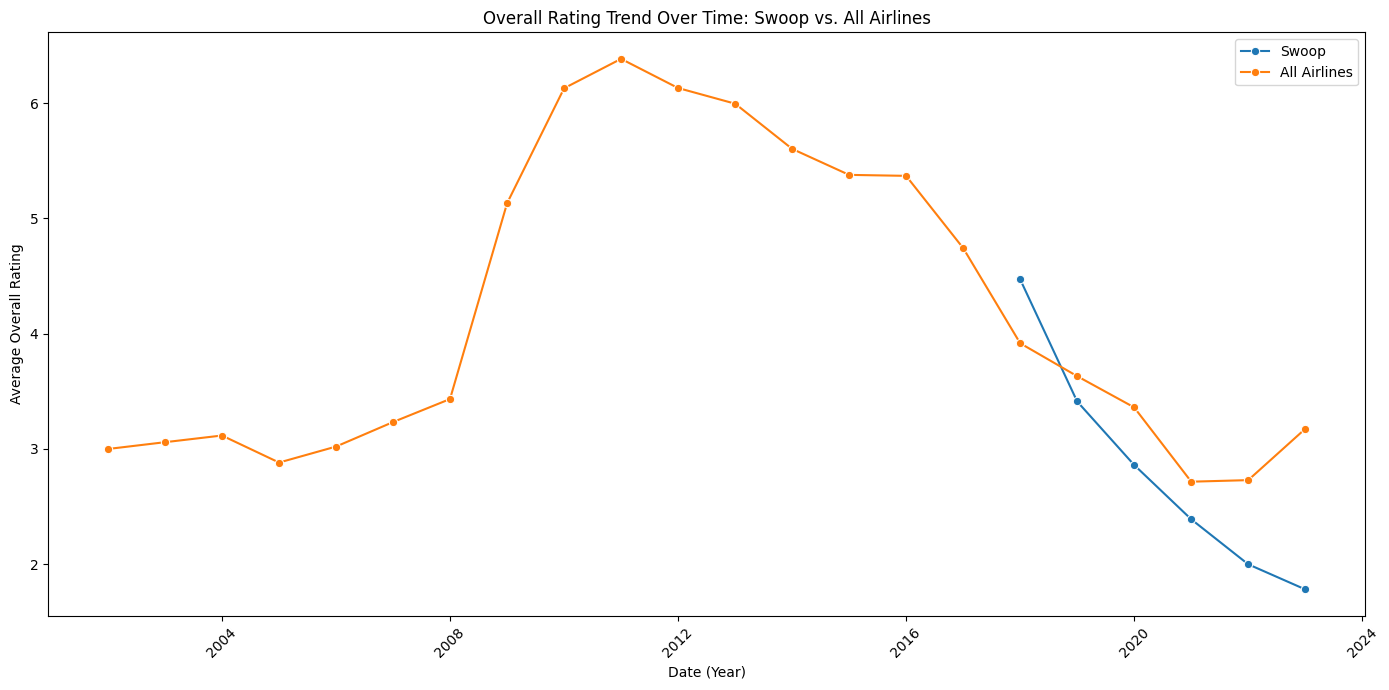

In [25]:
# Filter the DataFrame for the selected airline
df_selected_airline = df[df['AirlineName'] == airline_most_data_decreasing]

# Group the selected airline's data by year and quarter to calculate the mean 'OverallScore'
df_selected_trend = df_selected_airline.groupby(df_selected_airline['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()
df_selected_trend['DatePub'] = df_selected_trend['DatePub'].dt.to_timestamp()

# Group the overall data by year and quarter to calculate the mean 'OverallScore' for all airlines
df_overall_trend_all = df.groupby(df['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()
df_overall_trend_all['DatePub'] = df_overall_trend_all['DatePub'].dt.to_timestamp()

# Now let's plot both trends: Selected airline vs. All airlines
plt.figure(figsize=(14, 7))

# Plot for the selected airline
sns.lineplot(data=df_selected_trend, x='DatePub', y='OverallScore', marker='o', label=airline_most_data_decreasing)

# Plot for all airlines
sns.lineplot(data=df_overall_trend_all, x='DatePub', y='OverallScore', marker='o', label='All Airlines')

plt.title(f'Overall Rating Trend Over Time: {airline_most_data_decreasing} vs. All Airlines')
plt.xlabel('Date (Year)')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### EDA

In [66]:
df_swoop = df[df['AirlineName']=='Swoop']

# Sentiment Analysis

### NLTK (Vader Lexicon)

In [67]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment_polarity(text):
    scores = sid.polarity_scores(text)
    return 1 if scores['compound'] >=0 else 0



# Get the sentiment score
df_swoop['Review_score_nltk'] = df_swoop['Review'].apply(get_sentiment_polarity)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-67-ff2aa0c201c0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['Review_score_nltk'] = df_swoop['Review'].apply(get_sentiment_polarity)


In [68]:
df_swoop

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination,Review_score_nltk
105641,Swoop,Economy Class,2023-05,2023-05-07,0,0,5,Canada,8.0,yes,...,Staff was very nice,Couple Leisure,Trip Verified,5,0,8d3f5ea6-8ac4-40d8-a2a5-e71a0c7b9ba9,Boeing,Victoria,Toronto,1
105648,Swoop,Economy Class,2023-05,2023-05-02,0,3,2,Canada,3.0,no,...,one of the most unreliable airlines out there,Family Leisure,Trip Verified,2,0,74920751-8549-4c53-8fc9-b1236b8f86d7,Bombardier,Toronto,Cancún,1
105649,Swoop,Economy Class,2023-04,2023-04-30,0,0,1,Canada,1.0,no,...,"disgusted, outraged, exhausted",Couple Leisure,Not Verified,1,0,e0367294-1d0d-44e1-af85-6f8cb41b365b,Boeing,Vardero,Vancouver via Toronto,0
105650,Swoop,Economy Class,2023-03,2023-04-27,0,0,4,Canada,3.0,no,...,Swoop has the worst customer service,Couple Leisure,Not Verified,2,0,84ccbde4-5b07-46ab-8017-0b2ffea165f9,Airbus,Hamilton,Clearwater,0
105651,Swoop,Economy Class,2023-03,2023-04-25,0,0,1,Canada,1.0,no,...,I am shocked by poorly this has been handled,Couple Leisure,Trip Verified,1,0,ddc82671-005f-48b2-8d74-e18bb9e667fe,Embraer,Toronto,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107402,Swoop,Economy Class,2018-06,2018-07-05,0,0,1,Canada,1.0,no,...,last experience with Swoop,Solo Leisure,Trip Verified,2,0,e039fd2b-15a9-4ef4-9f2c-5f32c88f5b8f,Boeing,Winnipeg,Hamilton,0
107403,Swoop,Economy Class,2018-06,2018-07-05,4,0,4,Canada,9.0,yes,...,The pricing was amazing,Solo Leisure,Trip Verified,5,0,4dcbf41d-d234-478a-ad50-2e2f6f2db3fe,Boeing,Hamilton,Halifax,1
107404,Swoop,Economy Class,2018-07,2018-07-04,4,0,4,Canada,9.0,yes,...,really enjoyed our flight,Couple Leisure,Trip Verified,5,2,270ea112-66d2-4029-b899-2f2f91e551c4,Airbus,Abbotsford,Hamilton,1
107405,Swoop,Economy Class,2018-06,2018-06-28,0,0,1,Canada,1.0,no,...,how uncompassionate they were,Couple Leisure,Trip Verified,1,0,4ee0362a-31d9-45ad-a4f1-96452e6c27d4,Boeing,Hamilton,Halifax,0


### Flair

In [1]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 3

In [69]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')

def get_score(text):
    sentence = Sentence(text)
    classifier.predict(sentence)

    return 1 if sentence.labels[0].value =='POSITIVE' else 0


df_swoop['Review_score_flair'] = df_swoop['Review'].apply(get_score)

<ipython-input-69-41c826757480>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['Review_score_flair'] = df_swoop['Review'].apply(get_score)


Flair is time consuming compared to other models.

### Transformer Model

In [70]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", truncation=True)
def get_score(text):
    sentence = sentiment_pipeline(text)
    return 1 if sentence[0]['label'] =='POSITIVE' else 0

df_swoop['Review_score'] = df_swoop['Review'].apply(get_score)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

<ipython-input-70-9255acecb90a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['Review_score'] = df_swoop['Review'].apply(get_score)


In [32]:
df_swoop[['Review_score', 'Review', 'OverallScore']]

,Review_score,Review,OverallScore
105641,1,It all went smooth. The price was 1/3 of the m...,8.0
105648,0,Swoop is one of the most unreliable airlines o...,3.0
105649,0,"We tried to fly out of Varadero, Cuba yesterda...",1.0
105650,0,Swoop has the worst customer service. There ab...,3.0
105651,0,I wish that I had paid attention to the bad re...,1.0
...,...,...,...
107402,0,This is my very first experience with Swoop an...,1.0
107403,1,The pricing was amazing. The pricing was amazi...,9.0
107404,1,Abbotsford to Hamilton. We really enjoyed our ...,9.0
107405,0,"Hamilton to Halifax. I have flown a lot, and n...",1.0


In [33]:
#positive negative sentiment distribution
df_swoop['Review_score'].value_counts()

0    562
1    139
Name: Review_score, dtype: int64

In [71]:
#convert dataflow frmo periodic to Year wise
df_swoop['DateFlown'] = df_swoop['DateFlown'].dt.to_timestamp(freq='Y')

<ipython-input-71-aa9a5d2d6d82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['DateFlown'] = df_swoop['DateFlown'].dt.to_timestamp(freq='Y')


In [72]:
df_swoop.corr()

<ipython-input-72-14f13c6d16d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_swoop.corr()


,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,Review_score_nltk,Review_score_flair,Review_score
EntertainmentRating,1.000000,0.250873,0.283044,0.283316,0.271787,0.279000,0.296828,0.702422,0.197092,0.278544,0.232286
FoodRating,0.250873,1.000000,0.446404,0.439388,0.432143,0.453412,0.438522,0.222516,0.263710,0.404865,0.356169
GroundServiceRating,0.283044,0.446404,1.000000,0.883437,0.784323,0.810432,0.860559,0.342362,0.526932,0.808536,0.767830
OverallScore,0.283316,0.439388,0.883437,1.000000,0.756326,0.787345,0.910587,0.335494,0.603154,0.905187,0.872362
SeatComfortRating,0.271787,0.432143,0.784323,0.756326,1.000000,0.863021,0.737987,0.344224,0.425738,0.679855,0.640806
ServiceRating,0.279000,0.453412,0.810432,0.787345,0.863021,1.000000,0.767193,0.336300,0.464702,0.695267,0.663578
ValueRating,0.296828,0.438522,0.860559,0.910587,0.737987,0.767193,1.000000,0.351201,0.566352,0.835052,0.786450
WifiRating,0.702422,0.222516,0.342362,0.335494,0.344224,0.336300,0.351201,1.000000,0.232199,0.299799,0.288808
Review_score_nltk,0.197092,0.263710,0.526932,0.603154,0.425738,0.464702,0.566352,0.232199,1.000000,0.582482,0.585407
Review_score_flair,0.278544,0.404865,0.808536,0.905187,0.679855,0.695267,0.835052,0.299799,0.582482,1.000000,0.873138


<Axes: xlabel='DateFlown', ylabel='Review_score'>

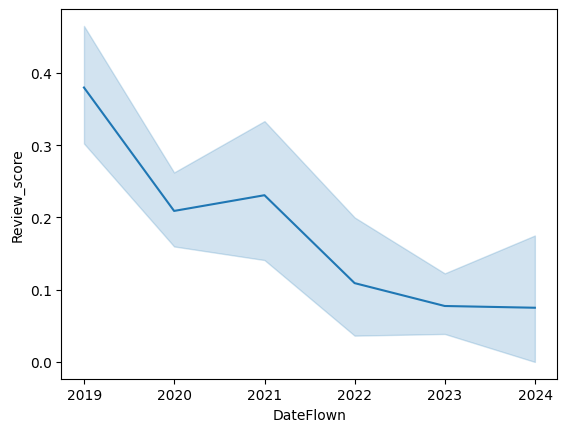

In [35]:
sns.lineplot(x='DateFlown', y='Review_score', data=df_swoop)

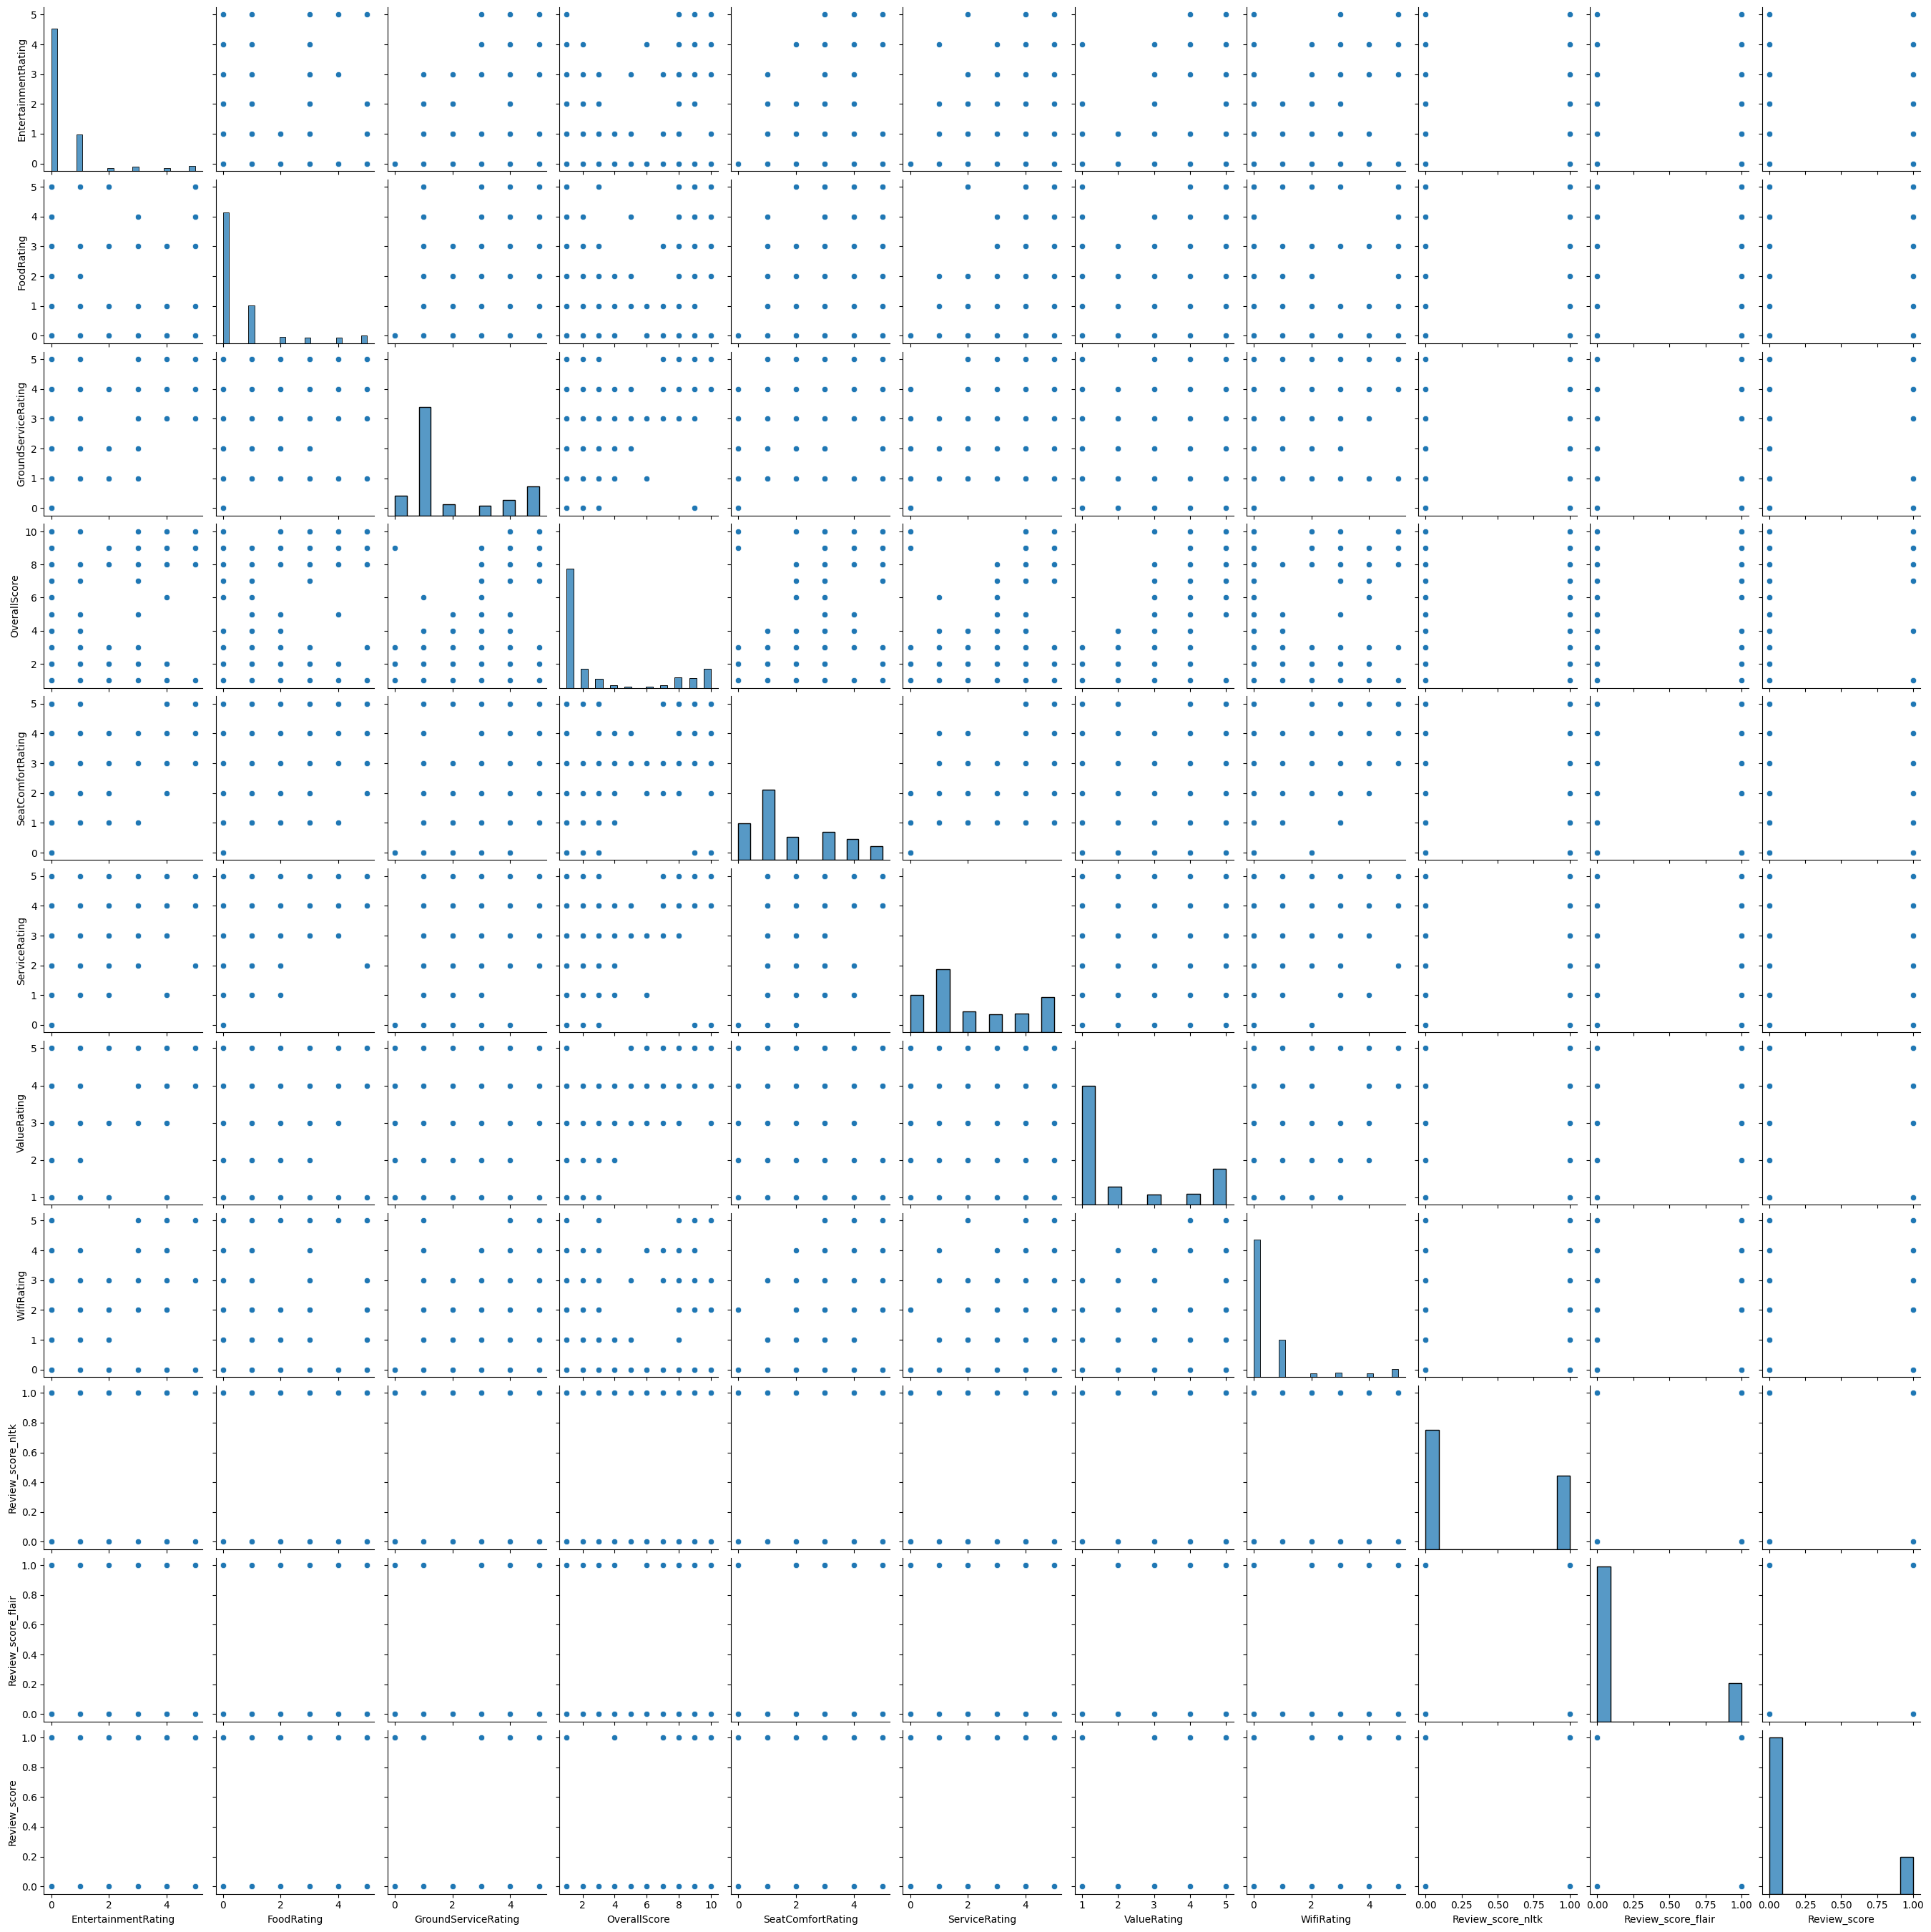

In [73]:
sns.pairplot(df_swoop)

<ipython-input-74-ff7b185518f4>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(reordered_data.corr(),annot=True)


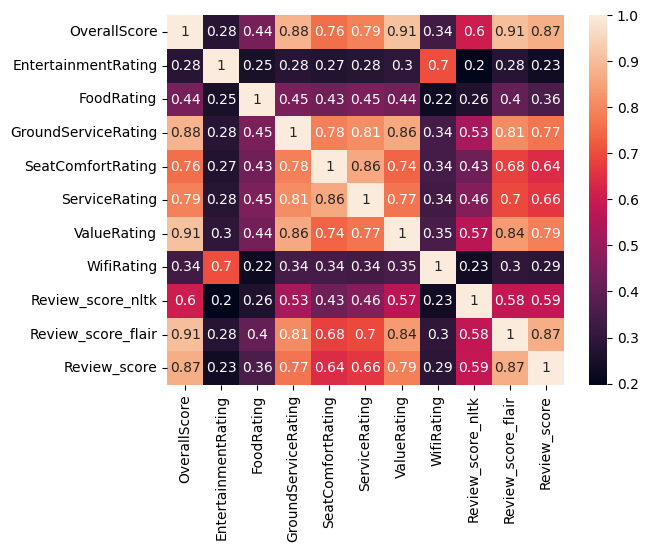

In [74]:
#heat map with OverallScore as first column
column_to_start = 'OverallScore'

# New column order with the specified column at the start
new_columns = [column_to_start] + [col for col in df_swoop.columns if col != column_to_start]

# Rearrange data according to the new column order
reordered_data = df_swoop[new_columns]


# Create heatmap
sns.heatmap(reordered_data.corr(),annot=True)
plt.show()

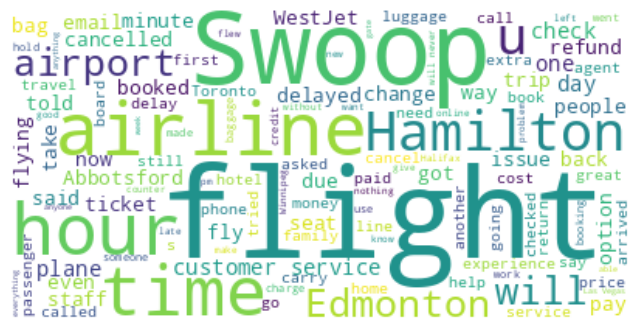

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud( background_color="white").generate(' '.join(df_swoop['Review'].astype(str))
)

# Display the generated word cloud image
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [76]:
df_swoop.to_csv("Swoop_airlines.csv")

### Apply a Model and Evaluation